In [1]:
import h5py
import rasterio
from rasterio.transform import from_origin

In [2]:
# Path to the input .h5 file
h5_file = '/Users/Emirhan/Desktop/MASK/Brwrd2/geo_velocity.h5'

# Path to save the output GeoTIFF
output_geotiff = '/Users/Emirhan/Desktop/MASK/Brwrd2/geo_velocity.tif'

In [3]:
# Open the .h5 file
with h5py.File(h5_file, 'r') as hf:
    # Assuming the velocity dataset is stored in the root of the file
    velocity_data = hf['velocity'][:]
    
    # Get the dimensions of the velocity dataset
    rows, cols = velocity_data.shape
    
    # Set the georeferencing information
    top_left_lon = -80.20630556765416
    top_left_lat = 26.184171660496155
    pixel_size_lon = (80.20630556765416 - 80.04886291041699) / cols
    pixel_size_lat = (26.184171660496155 - 25.9954055433606) / rows
    transform = from_origin(top_left_lon, top_left_lat, pixel_size_lon, pixel_size_lat)

    # Create a new GeoTIFF file
    with rasterio.open(output_geotiff, 'w', driver='GTiff', height=rows, width=cols, count=3, dtype=velocity_data.dtype,
                       transform=transform) as dst:
        # Write the velocity data to the GeoTIFF file
        for i in range(3):
            dst.write(velocity_data, i+1)

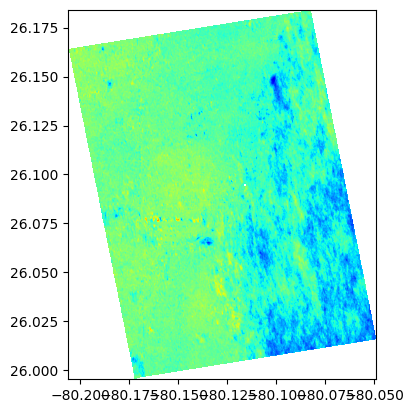

In [4]:
from rasterio.plot import show
# Open the GeoTIFF file for visualization
with rasterio.open(output_geotiff) as src:
    # Display the colorized velocity map
    show(src, cmap='jet')